# Table of Contents
 <p>

In [14]:
from __future__ import print_function
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import numpy as np

%matplotlib inline

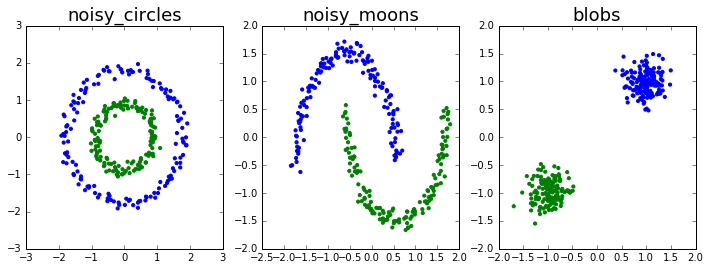

In [16]:
n_samples = 300
np.random.seed(0)

blobs = datasets.make_blobs(n_samples=n_samples, random_state=8, cluster_std=1.0, centers=[(5,5),(-5,-5)])
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
# no_structure = np.random.rand(n_samples, 2), None

#datasets_list = [noisy_circles, noisy_moons, blobs]
datasets_name = ["noisy_circles", "noisy_moons", "blobs"]

datasets_list = [
   (StandardScaler().fit_transform(X), y) for X,y in [noisy_circles, noisy_moons, blobs]
]

for dataset, dataset_name in zip(datasets_list, datasets_name):
    X, Y = dataset
    with open(dataset_name+".dat", "w") as f:
        for x, y in zip(X, Y):
            f.write(str(y)+","+str(x[0])+","+str(x[1])+"\r\n")
            
            

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

plt.figure(figsize=(len(datasets_list) * 2 + 6, 4))
#plt.subplots_adjust(left=.00, right=.98, bottom=.001, top=.96, wspace=.05,
#                    hspace=.01)


plot_num = 1
for i_dataset, (dataset, dataset_name) in enumerate(zip(datasets_list, datasets_name)):
    X, y = dataset
    # normalize dataset for easier parameter selection
    #X = StandardScaler().fit_transform(X)

    plt.subplot(1, len(datasets_list), plot_num)
    plt.title(datasets_name[i_dataset], size=18)
    plt.scatter(X[:, 0], X[:, 1], color=colors[y].tolist(), s=10)
    plot_num += 1
plt.savefig("data.png")

In [18]:
# データセットの分析
print("dataset")
print(X.shape)
print(X)

dataset
(300, 2)
[[-0.93365053 -1.14252366]
 [-1.30942924 -1.17678133]
 [-1.34024502 -1.31247403]
 [ 0.70594666  1.08441626]
 [-1.13881131 -0.70852498]
 [ 0.95614995  0.62875839]
 [-0.74981162 -0.78350103]
 [ 1.09808612  1.2002695 ]
 [ 1.27769397  0.92830348]
 [ 0.66613144  0.87694112]
 [ 1.10948853  0.7887627 ]
 [ 0.92864195  0.73758676]
 [-0.92868829 -0.80279069]
 [ 1.08601733  0.74345906]
 [ 1.154364    1.23561794]
 [ 0.89416792  1.00858977]
 [ 1.0118079   0.9626222 ]
 [-1.17281888 -1.31434157]
 [ 0.72273566  0.74879361]
 [ 1.07877266  0.9539195 ]
 [-1.06163979 -0.83651173]
 [-0.80747777 -0.86536142]
 [ 0.95357236  0.93521567]
 [ 0.99790942  0.95720042]
 [ 0.96365322  1.060812  ]
 [ 0.96123747  1.079676  ]
 [-0.49590886 -0.95943846]
 [-1.69287711 -1.23728585]
 [-0.9677135  -1.06734691]
 [-0.72189102 -0.96122346]
 [ 1.32631992  1.01557319]
 [-0.83740544 -1.10729247]
 [ 1.01495696  1.23246946]
 [-0.75697117 -1.12469424]
 [-1.14208326 -0.48239281]
 [ 0.97775225  0.87982092]
 [ 0.862810

In [32]:
import json

from embedded_jubatus import Clustering
from jubatus.clustering.types import WeightedDatum
from jubatus.clustering.types import WeightedIndex
from jubatus.clustering.types import IndexedPoint
from jubatus.common import Datum


CONFIG = {
    'method': 'kmeans',
    'parameter': {
        'k' : 2,
        'seed' : 0,
    },
    'compressor_parameter': {
        'bucket_size': 2,
    },
    'compressor_method' : 'simple',
    'converter': {
        'num_filter_types': {},
        'num_filter_rules': [],
        'string_filter_types': {},
        'string_filter_rules': [],
        'num_types': {},
        'num_rules': [
            {'key': '*', 'type': 'num'}
        ],
        'string_types': {},
        'string_rules': [
            {'key': '*', 'type': 'space',
             'sample_weight': 'bin', 'global_weight': 'bin'}
        ]
    },
}

client = Clustering(CONFIG)

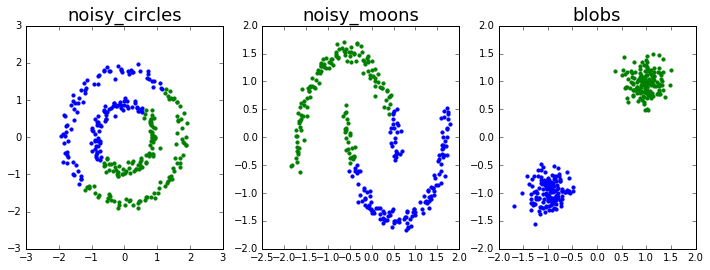

In [33]:
plot_num = 1
plt.figure(figsize=(len(datasets_list) * 2 + 6, 4))
for i_dataset, (dataset, dataset_name) in enumerate(zip(datasets_list, datasets_name)):
    plt.subplot(1, len(datasets_list), plot_num)

    plt.title(datasets_name[i_dataset], size=18)
    
    X, y = dataset
    # normalize dataset for easier parameter selection
    #X = StandardScaler().fit_transform(X)

    i = 0
    client.clear()
    for row in X:
        client.push([IndexedPoint(str(i), Datum({'x' : row[0], 'y' : row[1]}))])
        i += 1
#    print("{0} push done.".format(datasets_name[i_dataset]))
    
    clusters = client.get_core_members_light()
        
    y = 0
    for cluster in clusters:
        for weighted_index in cluster:           
            plt.scatter(X[int(weighted_index.id), 0], X[int(weighted_index.id), 1], color=colors[y].tolist(), s=10)
        y += 1
    plot_num += 1
plt.savefig("kmeans.png")

In [34]:
CONFIG['method'] = 'gmm'
client = Clustering(CONFIG)

noisy_circles push done.
noisy_moons push done.
blobs push done.


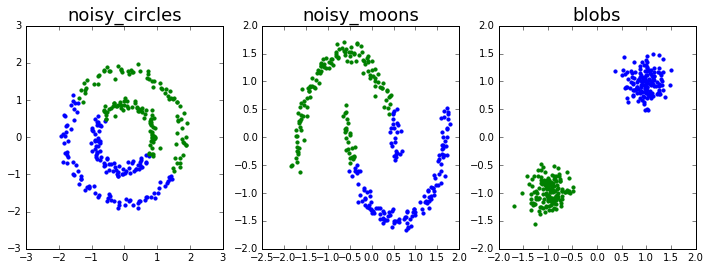

In [35]:
plot_num = 1
plt.figure(figsize=(len(datasets_list) * 2 + 6, 4))
for i_dataset, (dataset, dataset_name) in enumerate(zip(datasets_list, datasets_name)):
    plt.subplot(1, len(datasets_list), plot_num)

    plt.title(datasets_name[i_dataset], size=18)
    
    X, y = dataset
    # normalize dataset for easier parameter selection
    #X = StandardScaler().fit_transform(X)

    i = 0
    client.clear()
    for row in X:
        client.push([IndexedPoint(str(i), Datum({'x' : row[0], 'y' : row[1]}))])
        i += 1
    print("{0} push done.".format(datasets_name[i_dataset]))
    
    clusters = client.get_core_members_light()
        
    y = 0
    for cluster in clusters:
        for weighted_index in cluster:           
            plt.scatter(X[int(weighted_index.id), 0], X[int(weighted_index.id), 1], color=colors[y].tolist(), s=10)
        y += 1
    plot_num += 1
plt.savefig("gmm.png")

In [36]:
CONFIG['method'] = 'dbscan'
if 'k' in CONFIG['parameter']:
    del(CONFIG['parameter']['k'])
if 'seed' in CONFIG['parameter']:
    del(CONFIG['parameter']['seed'])
CONFIG['parameter']['eps'] = 0.3
CONFIG['parameter']['min_core_point'] = 2
#print(CONFIG)
client = Clustering(CONFIG)

noisy_circles push done.
noisy_moons push done.
blobs push done.


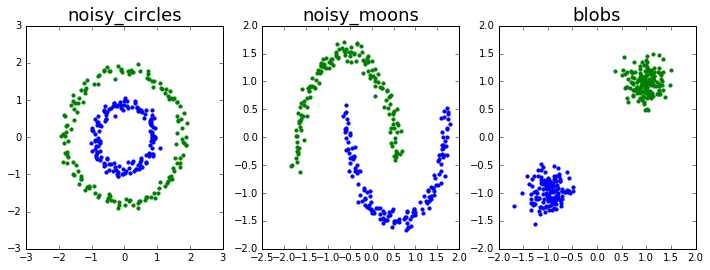

In [37]:
plot_num = 1
plt.figure(figsize=(len(datasets_list) * 2 + 6, 4))
for i_dataset, (dataset, dataset_name) in enumerate(zip(datasets_list, datasets_name)):
    plt.subplot(1, len(datasets_list), plot_num)

    plt.title(datasets_name[i_dataset], size=18)
    
    X, y = dataset
    # normalize dataset for easier parameter selection
    #X = StandardScaler().fit_transform(X)

    i = 0
    client.clear()
    for row in X:
        client.push([IndexedPoint(str(i), Datum({'x' : row[0], 'y' : row[1]}))])
        i += 1
    print("{0} push done.".format(datasets_name[i_dataset]))
    
    clusters = client.get_core_members_light()
        
    y = 0
    for cluster in clusters:
        for weighted_index in cluster:           
            plt.scatter(X[int(weighted_index.id), 0], X[int(weighted_index.id), 1], color=colors[y].tolist(), s=10)
        y += 1
    plot_num += 1
plt.savefig("dbscan.png")

In [12]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
labels_pred_all_correct = [0, 0, 0, 1, 1, 1]
labels_pred_alternative = [4, 4, 4, 5, 5, 5]
labels_pred2 = [0, 0, 0, 6, 6, 6]

print("adjusted rand index")
print(metrics.adjusted_rand_score(labels_true, labels_pred))
print(metrics.adjusted_rand_score(labels_true, labels_pred_all_correct))
print(metrics.adjusted_rand_score(labels_true, labels_pred_alternative))
print(metrics.adjusted_rand_score(labels_true, labels_pred2))

print("Mutual information based score")
print(metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print(metrics.adjusted_mutual_info_score(labels_true, labels_pred_all_correct))
print(metrics.adjusted_mutual_info_score(labels_true, labels_pred_alternative))
print(metrics.adjusted_mutual_info_score(labels_true, labels_pred2))

adjusted rand index
0.242424242424
1.0
1.0
1.0
Mutual information based score
0.225042310598
1.0
1.0
1.0


# Adjusted Rand Index
http://y-uti.hatenablog.jp/entry/2014/01/19/133936

